CV_LAB1

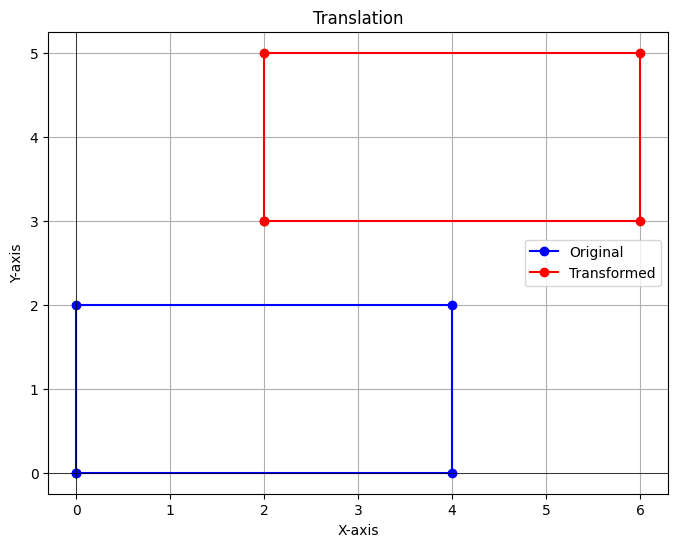

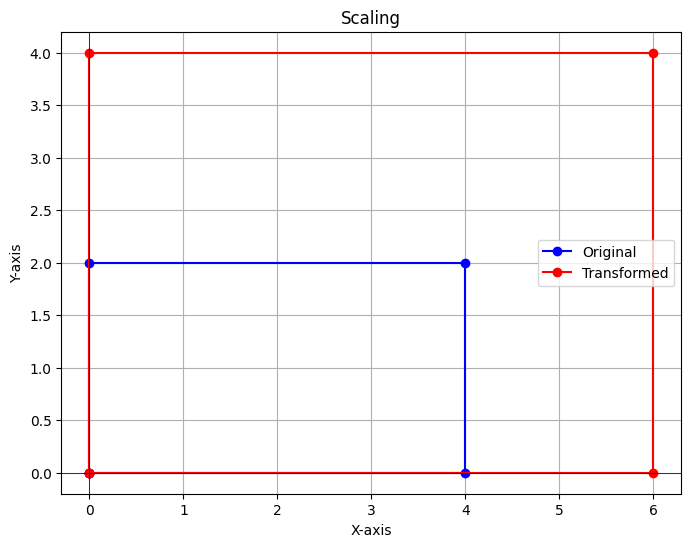

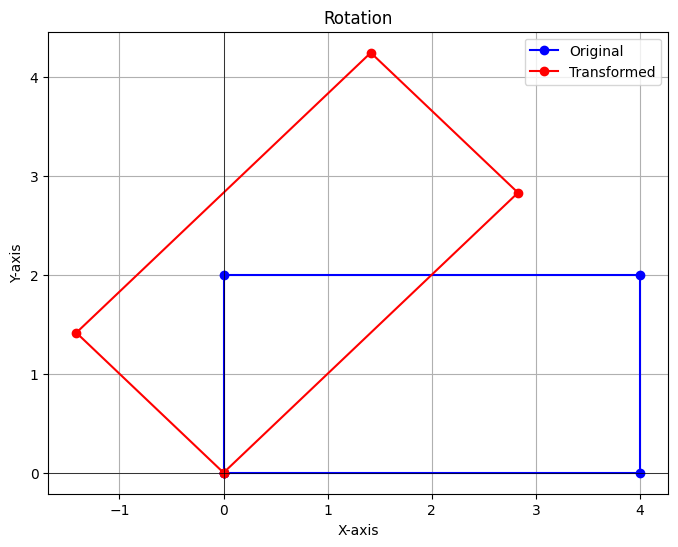

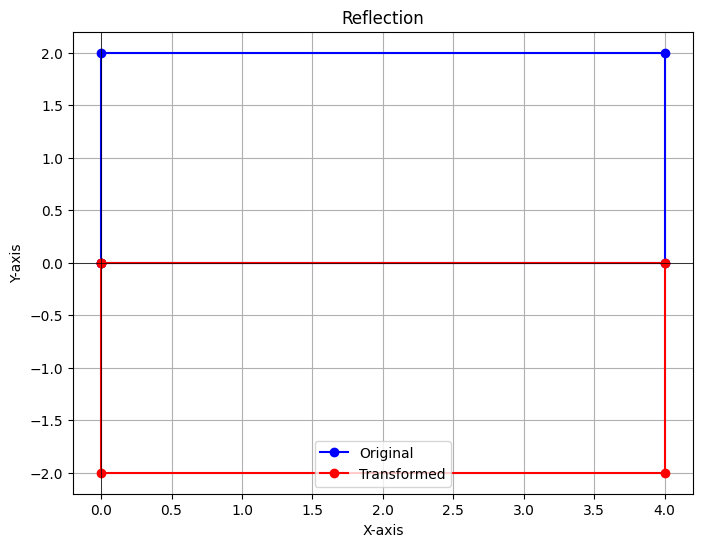

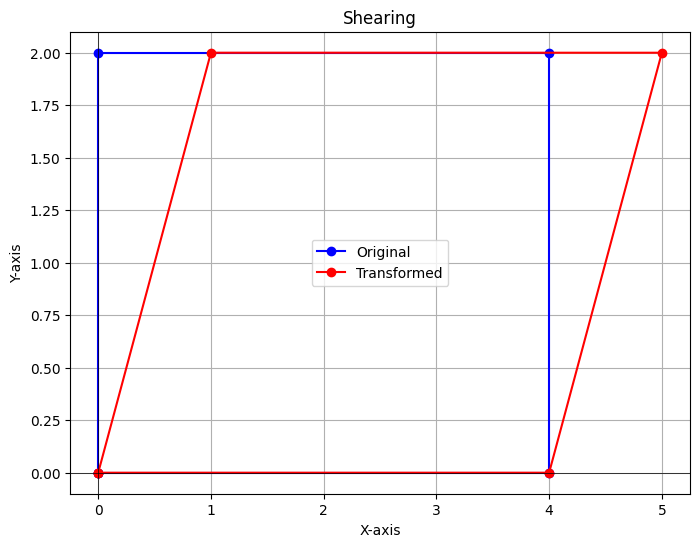

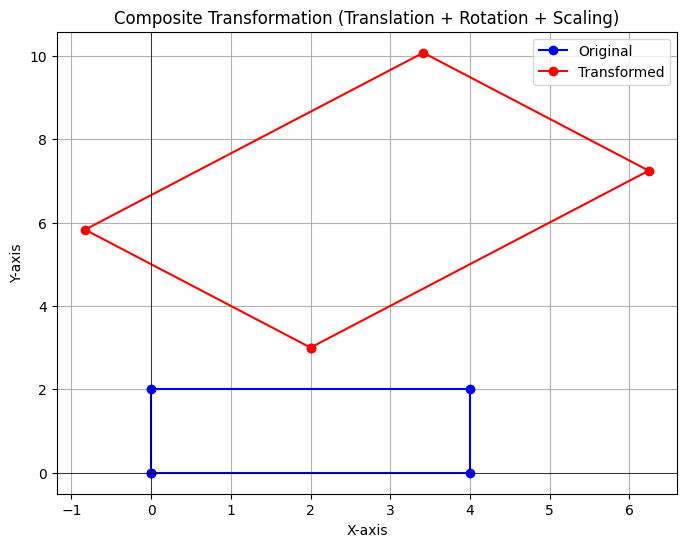

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
def plot_object(vertices, transformed_vertices, title):
    plt.figure(figsize=(8, 6))

    original_x, original_y = vertices[:, 0], vertices[:, 1]
    plt.plot(
        np.append(original_x, original_x[0]),
        np.append(original_y, original_y[0]),
        'b-o', label='Original'
    )


    transformed_x, transformed_y = transformed_vertices[:, 0], transformed_vertices[:, 1]
    plt.plot(
        np.append(transformed_x, transformed_x[0]),
        np.append(transformed_y, transformed_y[0]),
        'r-o', label='Transformed'
    )

    plt.title(title)
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.axhline(0, color='black', linewidth=0.5)
    plt.axvline(0, color='black', linewidth=0.5)
    plt.grid(True)
    plt.legend()
    plt.show()


vertices = np.array([
    [0, 0],
    [4, 0],
    [4, 2],
    [0, 2]
])


def translate(vertices, tx, ty):
    translation_matrix = np.array([
        [1, 0, tx],
        [0, 1, ty],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    transformed_vertices = homogeneous_vertices @ translation_matrix.T
    return transformed_vertices[:, :2]


def scale(vertices, sx, sy):
    scaling_matrix = np.array([
        [sx, 0, 0],
        [0, sy, 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    transformed_vertices = homogeneous_vertices @ scaling_matrix.T
    return transformed_vertices[:, :2]


def rotate(vertices, angle):
    angle_rad = np.radians(angle)
    rotation_matrix = np.array([
        [np.cos(angle_rad), -np.sin(angle_rad), 0],
        [np.sin(angle_rad), np.cos(angle_rad), 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    transformed_vertices = homogeneous_vertices @ rotation_matrix.T
    return transformed_vertices[:, :2]


def reflect(vertices, axis):
    if axis == 'x':
        reflection_matrix = np.array([
            [1, 0, 0],
            [0, -1, 0],
            [0, 0, 1]
        ])
    elif axis == 'y':
        reflection_matrix = np.array([
            [-1, 0, 0],
            [0, 1, 0],
            [0, 0, 1]
        ])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    transformed_vertices = homogeneous_vertices @ reflection_matrix.T
    return transformed_vertices[:, :2]


def shear(vertices, shx, shy):
    shearing_matrix = np.array([
        [1, shx, 0],
        [shy, 1, 0],
        [0, 0, 1]
    ])
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    transformed_vertices = homogeneous_vertices @ shearing_matrix.T
    return transformed_vertices[:, :2]


def composite_transform(vertices, transformations):

    composite_matrix = np.eye(3)
    for transformation in transformations:
        composite_matrix = composite_matrix @ transformation
    homogeneous_vertices = np.c_[vertices, np.ones(vertices.shape[0])]
    transformed_vertices = homogeneous_vertices @ composite_matrix.T
    return transformed_vertices[:, :2]

translated_vertices = translate(vertices, 2, 3)
scaled_vertices = scale(vertices, 1.5, 2)
rotated_vertices = rotate(vertices, 45)
reflected_vertices = reflect(vertices, 'x')
sheared_vertices = shear(vertices, 0.5, 0)

translation_matrix = np.array([
    [1, 0, 2],
    [0, 1, 3],
    [0, 0, 1]
])

rotation_matrix = np.array([
    [np.cos(np.radians(45)), -np.sin(np.radians(45)), 0],
    [np.sin(np.radians(45)), np.cos(np.radians(45)), 0],
    [0, 0, 1]
])

scaling_matrix = np.array([
    [1.5, 0, 0],
    [0, 2, 0],
    [0, 0, 1]
])

composite_vertices = composite_transform(vertices, [translation_matrix, rotation_matrix, scaling_matrix])


plot_object(vertices, translated_vertices, "Translation")
plot_object(vertices, scaled_vertices, "Scaling")
plot_object(vertices, rotated_vertices, "Rotation")
plot_object(vertices, reflected_vertices, "Reflection")
plot_object(vertices, sheared_vertices, "Shearing")
plot_object(vertices, composite_vertices, "Composite Transformation (Translation + Rotation + Scaling)")


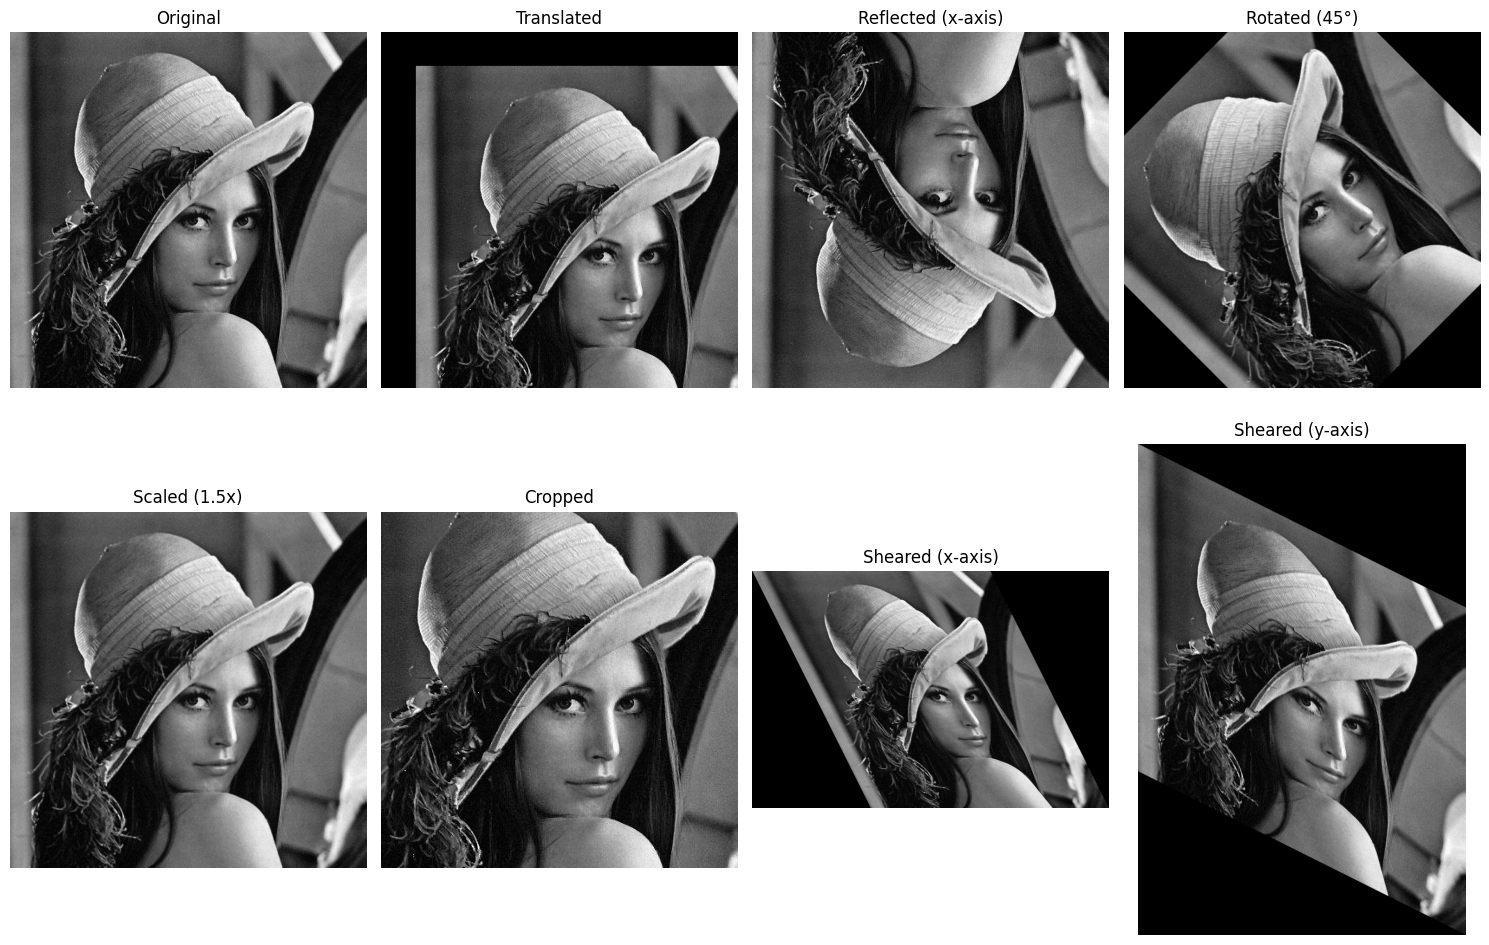

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image_path = "/content/img_1.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

rows, cols, _ = image.shape

def translate(image, tx, ty):
    matrix = np.float32([[1, 0, tx], [0, 1, ty]])
    translated = cv2.warpAffine(image, matrix, (cols, rows))
    return translated


def reflect(image, axis):
    if axis == 'x':
        matrix = np.float32([[1, 0, 0], [0, -1, rows]])
    elif axis == 'y':
        matrix = np.float32([[-1, 0, cols], [0, 1, 0]])
    reflected = cv2.warpAffine(image, matrix, (cols, rows))
    return reflected


def rotate(image, angle):
    center = (cols // 2, rows // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1)
    rotated = cv2.warpAffine(image, matrix, (cols, rows))
    return rotated


def scale(image, fx, fy):
    scaled = cv2.resize(image, None, fx=fx, fy=fy, interpolation=cv2.INTER_LINEAR)
    return scaled


def crop(image, start_row, start_col, end_row, end_col):
    cropped = image[start_row:end_row, start_col:end_col]
    return cropped


def shear_x(image, shx):
    matrix = np.float32([[1, shx, 0], [0, 1, 0]])
    sheared = cv2.warpAffine(image, matrix, (cols + int(rows * abs(shx)), rows))
    return sheared


def shear_y(image, shy):
    matrix = np.float32([[1, 0, 0], [shy, 1, 0]])
    sheared = cv2.warpAffine(image, matrix, (cols, rows + int(cols * abs(shy))))
    return sheared


translated_image = translate(image, 50, 50)
reflected_image_x = reflect(image, 'x')
rotated_image = rotate(image, 45)
scaled_image = scale(image, 1.5, 1.5)
cropped_image = crop(image, 50, 50, rows - 50, cols - 50)
sheared_image_x = shear_x(image, 0.5)
sheared_image_y = shear_y(image, 0.5)


titles = ['Original', 'Translated', 'Reflected (x-axis)', 'Rotated (45°)', 'Scaled (1.5x)', 'Cropped', 'Sheared (x-axis)', 'Sheared (y-axis)']
images = [image, translated_image, reflected_image_x, rotated_image, scaled_image, cropped_image, sheared_image_x, sheared_image_y]

plt.figure(figsize=(15, 10))
for i in range(len(images)):
    plt.subplot(2, 4, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
